<a href="https://colab.research.google.com/github/basharataly/nyu-python-public-policy/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [198]:

drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:


df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
shelter=pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD')


In [202]:
shelter.head(5)

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


In [203]:
shelter.new= shelter['Report Date'][shelter['Report Date']== '09/30/2019']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [0]:
shelter2 = shelter[shelter['Report Date'].isin(shelter.new)]

In [205]:
shelter2.head(5)


,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0


In [206]:
shelter2.fillna(0)

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0
629,09/30/2019,Bronx,206,0.0,1.0,2.0,1.0,3.0,0.0,19.0
630,09/30/2019,Bronx,207,0.0,1.0,5.0,0.0,4.0,0.0,3.0
631,09/30/2019,Bronx,208,0.0,0.0,0.0,0.0,0.0,0.0,1.0
632,09/30/2019,Bronx,209,0.0,0.0,1.0,0.0,5.0,0.0,2.0
633,09/30/2019,Bronx,210,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [207]:
shelter2.drop_duplicates()
 

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [0]:
def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame)

In [209]:
sum_frame_by_column(shelter2, 'total', ['Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0,8.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0,32.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0,21.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0,26.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0,13.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0,8.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0


In [0]:
shelter22= shelter22.rename(columns={"Community District": "borocd"})

In [211]:
shelter22

,Report Date,Borough,borocd,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0,8.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0,32.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0,21.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0,26.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0,13.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0,8.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0


In [212]:
df.new= df['complaint_type'][df['complaint_type']== 'Homeless Person Assistance']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [0]:
df2=df[df['complaint_type'].isin(df.new)]

In [214]:
df2.head(4)

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
46,46,46,39887175,08/01/2018 12:15:12 AM,08/01/2018 01:29:09 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10016,478 THIRD AVENUE,THIRD AVENUE,EAST 32 STREET,EAST 33 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:12 AM,The mobile outreach response team offered serv...,08/01/2018 01:29:09 AM,06 MANHATTAN,1.008880e+09,MANHATTAN,990113.0,210611.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744753,-73.978841,"(40.74475319239264, -73.97884116795397)",106.0
47,47,47,39883411,08/01/2018 12:15:39 AM,08/01/2018 01:33:51 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Residential Building/House,10035,445 EAST 120 STREET,EAST 120 STREET,1 AVENUE,PLEASANT AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:39 AM,The mobile outreach response team went to the ...,08/01/2018 01:33:51 AM,11 MANHATTAN,1.018080e+09,MANHATTAN,1003119.0,229980.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.797898,-73.931850,"(40.797897839118114, -73.93184977463629)",111.0
145,150,150,39881402,08/01/2018 12:59:43 AM,08/01/2018 02:10:40 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10027,624 WEST 125 STREET,WEST 125 STREET,BROADWAY,ST CLAIR PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:59:43 AM,The mobile outreach response team went to the ...,08/01/2018 02:10:40 AM,09 MANHATTAN,1.019950e+09,MANHATTAN,995623.0,236699.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.816352,-73.958912,"(40.81635246371125, -73.95891211015879)",109.0


In [0]:
df2_hpa=df2.groupby('borocd').size().reset_index(name='count_of_311_requests')

In [216]:
df2_hpa.head(3)

,borocd,count_of_311_requests
0,101.0,758
1,102.0,965
2,103.0,520


In [217]:
merged_data = pd.merge(left=df2_hpa, right=shelter22,left_on='borocd', right_on='borocd')
merged_data

,borocd,count_of_311_requests,Report Date,Borough,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
0,101.0,758,09/30/2019,Manhattan,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
1,103.0,520,09/30/2019,Manhattan,NaN,NaN,7.0,2.0,3.0,2.0,3.0,17.0
2,104.0,1055,09/30/2019,Manhattan,NaN,1.0,3.0,NaN,NaN,4.0,NaN,8.0
3,105.0,3020,09/30/2019,Manhattan,NaN,1.0,NaN,NaN,NaN,8.0,1.0,10.0
4,106.0,753,09/30/2019,Manhattan,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0
5,107.0,1684,09/30/2019,Manhattan,NaN,1.0,3.0,NaN,NaN,NaN,3.0,7.0
6,108.0,633,09/30/2019,Manhattan,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
7,109.0,303,09/30/2019,Manhattan,NaN,NaN,NaN,NaN,1.0,NaN,5.0,6.0
8,110.0,283,09/30/2019,Manhattan,NaN,1.0,10.0,NaN,1.0,NaN,11.0,23.0
9,111.0,373,09/30/2019,Manhattan,NaN,NaN,10.0,NaN,7.0,NaN,8.0,25.0


In [218]:
merged_data.fillna(0)

,borocd,count_of_311_requests,Report Date,Borough,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
0,101.0,758,09/30/2019,Manhattan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,103.0,520,09/30/2019,Manhattan,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
2,104.0,1055,09/30/2019,Manhattan,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
3,105.0,3020,09/30/2019,Manhattan,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
4,106.0,753,09/30/2019,Manhattan,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0
5,107.0,1684,09/30/2019,Manhattan,0.0,1.0,3.0,0.0,0.0,0.0,3.0,7.0
6,108.0,633,09/30/2019,Manhattan,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,109.0,303,09/30/2019,Manhattan,0.0,0.0,0.0,0.0,1.0,0.0,5.0,6.0
8,110.0,283,09/30/2019,Manhattan,0.0,1.0,10.0,0.0,1.0,0.0,11.0,23.0
9,111.0,373,09/30/2019,Manhattan,0.0,0.0,10.0,0.0,7.0,0.0,8.0,25.0


<Figure size 1080x432 with 0 Axes>

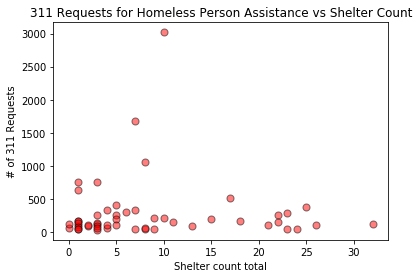

In [220]:

plt.figure(figsize=(15, 6))

merged_data.plot.scatter('total', 'count_of_311_requests', s=50, c='red', edgecolors='black', alpha=0.5) 

plt.title('311 Requests for Homeless Person Assistance vs Shelter Count')
plt.xlabel('Shelter count total')
plt.ylabel('# of 311 Requests')

plt.show()

In [221]:
x = np.array(merged_data['total'])
y = np.array(merged_data.count_of_311_requests)
np.corrcoef(x, y)

array([[ 1.        , -0.00781267],
       [-0.00781267,  1.        ]])

In [222]:

y = np.array(merged_data['total'])
x = np.array(merged_data.count_of_311_requests)
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

print(model.summary())

[[1.000e+00 7.580e+02]
 [1.000e+00 5.200e+02]
 [1.000e+00 1.055e+03]
 [1.000e+00 3.020e+03]
 [1.000e+00 7.530e+02]
 [1.000e+00 1.684e+03]
 [1.000e+00 6.330e+02]
 [1.000e+00 3.030e+02]
 [1.000e+00 2.830e+02]
 [1.000e+00 3.730e+02]
 [1.000e+00 2.620e+02]
 [1.000e+00 1.880e+02]
 [1.000e+00 4.000e+01]
 [1.000e+00 4.700e+01]
 [1.000e+00 1.220e+02]
 [1.000e+00 1.010e+02]
 [1.000e+00 1.080e+02]
 [1.000e+00 8.800e+01]
 [1.000e+00 9.900e+01]
 [1.000e+00 5.700e+01]
 [1.000e+00 3.000e+01]
 [1.000e+00 5.200e+01]
 [1.000e+00 6.600e+01]
 [1.000e+00 3.380e+02]
 [1.000e+00 4.140e+02]
 [1.000e+00 2.620e+02]
 [1.000e+00 2.150e+02]
 [1.000e+00 1.620e+02]
 [1.000e+00 3.380e+02]
 [1.000e+00 2.090e+02]
 [1.000e+00 1.530e+02]
 [1.000e+00 8.600e+01]
 [1.000e+00 1.030e+02]
 [1.000e+00 1.590e+02]
 [1.000e+00 1.670e+02]
 [1.000e+00 1.290e+02]
 [1.000e+00 4.900e+01]
 [1.000e+00 1.090e+02]
 [1.000e+00 1.140e+02]
 [1.000e+00 2.540e+02]
 [1.000e+00 2.000e+02]
 [1.000e+00 9.800e+01]
 [1.000e+00 1.320e+02]
 [1.000e+00

In [223]:

p = model.params
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [ 8.63529994e+00 -1.35869507e-04]
R2: 6.103776725729926e-05


In [224]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = -0.0x + 8.64; R2 = 0.0


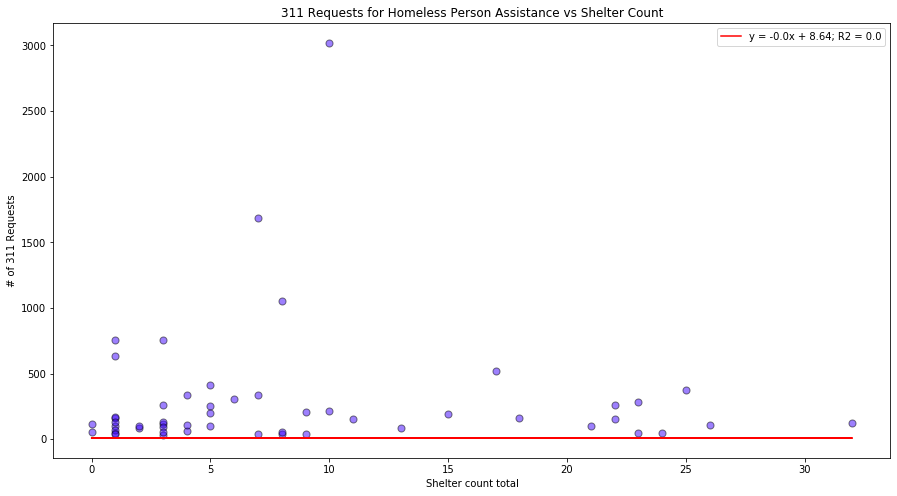

In [227]:

x_dummy = np.array(merged_data['total'])

plt.figure(figsize=(15, 8))

plt.scatter(
    np.array(merged_data['total']), # x
    np.array(merged_data.count_of_311_requests), # y
    s=50, 
    c='#3d03fc', 
    edgecolors='black', 
    alpha=0.5) 

plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='r',
    label=label)

plt.title('311 Requests for Homeless Person Assistance vs Shelter Count')
plt.xlabel('Shelter count total')
plt.ylabel('# of 311 Requests')
plt.legend()

plt.show()


#11. The correlation tells us about a very weak negative  relationship between concentration of homeless shelters and frequency of 311 requests related to homelessness. Also the P-value in the regression outputt tells us that the relationship is not significant. This is further supported by the scatter best fit line where one can see that the slope is downward sloping but almost flat.